# Machine Learning for Sepsis Pathway 

## Plotting Notebook. 

Setup Libraries and plotting defaults. 

In [10]:
import pickle
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

import seaborn as sns

import Utilities
import importlib
importlib.reload(Utilities)

import MLUtilities
importlib.reload(MLUtilities)

from sklearn.pipeline import Pipeline


# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


# from hyperopt.pyll import scope
# from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

from hyperopt import hp,Trials,fmin,tpe,STATUS_OK

import xgboost as xgb

from imblearn.over_sampling import SMOTENC


# import sys
# import os
# import pickle

# import pandas as pd
# import numpy as np
# import seaborn as sns
# #import statsmodels.formula.api as smf
# #from statsmodels.stats.anova import anova_lm


# import re
# import matplotlib.pyplot as plt
# from openpyxl import load_workbook
# from pandasql import sqldf
# import sqlalchemy
# import pyodbc

# import dfply as dfp
# from dfply import *

# import datetime
# from datetime import *

# import pyodbc
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
# from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# import sklearn

# from sklearn import model_selection
# from sklearn.model_selection import cross_val_score

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn import tree
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split


# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier

# import forestci as fci

# from sklearn.linear_model import BayesianRidge
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, PowerTransformer
# from sklearn.metrics import r2_score, classification_report, confusion_matrix, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
# #from statsmodels.stats.outliers_influence import variance_inflation_factor
# #from statsmodels.tools.tools import add_constant
# import xgboost as xgb
# from imblearn.over_sampling import SMOTENC
# n_est=55

# from hyperopt.pyll import scope
# from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK

# pd.set_option('display.max_columns', None)


# import Utilities
# import importlib
# importlib.reload(Utilities)

# import MLUtilities
# importlib.reload(MLUtilities)

# from matplotlib.colors import to_rgba

plt.style.use('./CEIH.mplstyle')
color_dict = {0: to_rgba('#32C0D2', 1),
                1: to_rgba("#E0B165", 1),}

cmap_blended = sns.blend_palette(["#ADE6ED","#70D3E0","#32C0D2","#289AA8","#307078"], as_cmap=True)


import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1],idx-1
    else:
        return array[idx],idx
    
OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
               'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
             'FirstGCSScoreAdult':'Glasgow Coma Scale',
               'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
               'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
               'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':'O2 Saturation (%)',  'Gender_Male':'Sex - Male',
               'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
               'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
               'FirstO2Flow':'O2 Flow ','GENDERCODE_Male':'Sex - Male','GENDERCODE_Unknown':'Sex - Unknown',
               'GENDERCODE_Indeterminate':'Sex - Indeterminate'
               }


plotSettings = {
        #  ( bins, xmin, xmax, log/linear)
        'AGEONADMISSION':(45,19.5,109.5,'linear','Age (y)', False, 0,0),
        
        
        'FirstBloodGlucose':(50,0,100,'log','Blood Glucose [mmol/L]', False,0, 0),
        'FirstTemperatureDegreesC':(50,30,45,'log', r"Temperature [$^\circ$C]", True,35.5,38.1),
                'FirstWeightKg':(50,50,150,'log','Weight [kg]', False, 0,0),

        
        'FirstPainAssessment': (11,-0.5,10.5,'log','Pain Assessment', False, 8,10),
        'FirstBPSystolic': (50,50,250,'log', 'BP Systolic [mm Hg]',True, 100,170 ),
        'FirstBPDiastolic': (50,0,200,'log', 'BP Diastolic [mm Hg]', False,0,0),
        'FirstEstimatedGlomerularFiltrationRate': (50,0,100,'log',r"Estimated Glomerular Filtration Rate [mL/min/1.73m$^{2}$]", True, 60, 100),
        'FirstCreatinine': (50,0,800,'log',r"Creatinine - Serum [$\mu$mol/L]", True, 45, 110),
        'FirstAlbumin': (60,0,60,'log','Albumin  Level [g/L]', True, 30, 48),
        'FirstTotalBilirubin': (60,0,100,'log',r"Total Bilirubin Level [$\mu$mol/L]", True, 2, 24 ),
        'FirstAlkalinePhosphatase': (60,0,800,'log','Alkaline Phosphatase Level [U/L]',True, 30,110),
        'FirstAlanineAminotransferase': (60,0,700,'log','Alanine Aminotransferase Level [U/L]', True,0,55),
        'FirstAspartateAminotransferase': (60,0,700,'log','Aspartate Aminotransferase Level [U/L]', True, 0,45),
        'FirstGammaGlutamylTransferase': (60,0,700,'log','Gamma Glutamyl Transferase Level [U/L]', True, 0, 60),
        'FirstLactateDehydrogenase': (60,0,1200,'log','Lactate Dehydrogenase [U/L]', True, 120, 250),
        'FirstHaemoglobin': (50,10, 220,'log','Haemoglobin [g/L]', True, 115, 175),
        'FirstWhiteCellCount': (50,0, 50,'log',r"White Cell Count [$\times 10^{9}$/L]",True, 4,11),
        'FirstPlateletCount': (50,0, 1000,'log',r"Platelet Count [$\times 10^{9}$/L]",True,150,500),
        'FirstNeutrophils': (50,0, 50,'log',r"Absolute Neutrophil Count [$\times 10^{9}$/L]",True,1.80,7.50),
        'FirstDDimer': (40,0, 20,'log',r"D-Dimer [mg/L]",True,0,0.79),
        'FirstCreactiveprotein': (50,0, 600,'log',r"C-Reactive Protein [mg/L]",True, 0,8),
        'FirstTroponinT': (50,0, 600,'log',r"Troponin T Level [mg/L]",True,0,16),
        'FirstNTproBNP': (50,0, 40000,'log',r"NT-pro Brain Natriuretic Peptide [mg/L]",True,0,124),
        
        'FirstAnionGapVenous': (50,0, 50,'log',r"Anion Gap Venous [mmol/L]", True, 7, 17),
        'FirstAnionGapArterial': (50,0, 50,'log',r"Anion Gap Arterial [mmol/L]",  True, 7, 17),
        'FirstBaseExcessVenous': (50,-30, 30,'log',r"Base Excess Venous [mmol/L]", True, -3, 3),
        'FirstBaseExcessArterial': (50,-30, 30,'log',r"Base Excess Arterial [mmol/L]", True, -3, 3),
        'FirstBilirubinVenous': (60,0, 60,'log',r"Bilirubin Venous [$\mu$mol/L]", True, 2,24),
        'FirstBilirubinArterial': (60,0, 60,'log',r"Bilirubin Arterial [$\mu$mol/L]", True, 2,24),
        'FirstCarboxyhaemoglobinVenous': (50,0, 20,'log',r"Carboxyhaemoglobin Venous [%]", True, 0.3, 1.8),
        'FirstCarboxyhaemoglobinArterial': (50,0, 20,'log',r"Carboxyhaemoglobin Arterial [%]", True, 0.3, 1.8),
        'FirstChlorideDirectVenous': (50,50, 150,'log',r"Chloride Direct Venous [mmol/L]",False, 100,109),
        'FirstChlorideDirectArterial': (50,50, 150,'log',r"Chloride Direct Arterial [mmol/L]", True, 100,109),
        'FirstCreatinineVenous':(50,0,500,'log',r"Creatinine Venous [$\mu$mol/L]", True, 50, 120),
        'FirstCreatinineArterial':(50,0,500,'log',r"Creatinine Arterial [$\mu$mol/L]", True, 50,120),
        'FirstGlucoseVenous':(50,0,30,'log',r"Glucose  Venous [mmol/L]", False,0,0),
        'FirstGlucoseArterial':(50,0,30,'log',r"Glucose  Arterial [mmol/L]", True,2.6,5.6),
        'FirstIonised Calcium Venous':(50,0,2,'log',r"Ionised Calcium Venous [mmol/L]", True, 1.1, 1.3),
        'FirstIonised Calcium Arterial':(50,0,2,'log',r"Ionised Calcium Arterial [mmol/L]", True, 1.1, 1.3),
        'FirstLactateVenous':(50,0,30,'log',r"Lactate Venous [mmol/L]", True, 0.2, 2.0),
        'FirstLactateArterial':(50,0,30,'log',r"Lactate Arterial [mmol/L]", True, 0.2, 2.0),
        'FirstMethaemoglobinVenous': (20,0, 3,'log',r"Methaemoglobin Venous [%]", True, 0.4, 1.2),
        'FirstMethaemoglobinArterial': (20,0, 3,'log',r"Methaemoglobin Arterial [%]", True, 0.2,0.6),
        'FirstOxygenSaturationVenous': (50,0, 100,'log',r"Oxygen Saturation Venous [%]", False, 0,0),
        'FirstOxygenSaturationArterial': (50,0, 100,'log',r"Oxygen Saturation Arterial [%]", True,95, 99),
        'FirstOxyhaemoglobinVenous': (50,0, 100,'log',r"Oxyhaemoglobin Venous [%]", False, 0,0),
        'FirstOxyhaemoglobinArterial': (50,0, 100,'log',r"Oxyhaemoglobin Arterial [%]", False, 0,0),
        'FirstReducedHaemoglobinVenous': (50,0, 100,'log',r"Reduced Haemoglobin Venous [%]", False, 0,0),
        'FirstReducedHaemoglobinArterial': (50,0, 100,'log',r"Reduced Haemoglobin Arterial [%]", False, 0,0),
        'FirstTotalHaemoglobinVenous': (50,10, 220,'log','Total Haemoglobin Venous [g/L]', True, 115,180),
        'FirstTotalHaemoglobinArterial': (50,10, 220,'log','Total Haemoglobin Arterial [g/L]', True, 115,180), 
        'FirstpCO2Venous': (50,0,150,'log', 'pCO2 Venous [mm Hg]', True,41,51),
        'FirstpCO2Arterial': (50,0,150,'log', 'pCO2 Arterial [mm Hg]', True, 35, 45 ),
        'FirstpO2Venous': (50,0,200,'log', 'pO2 Venous [mm Hg]', True, 25,40),
        'FirstpO2Arterial': (50,0,200,'log', 'pO2 Arterial [mm Hg]', True,67, 108),
        'FirstpHVenous': (50,6.8,7.8,'log', 'pH Venous', True, 7.32,7.42),
        'FirstpHArterial': (50,6.8,7.8,'log', 'pH Arterial', True, 7.36, 7.44),
        'FirstPotassiumDirectVenous':(50,0,10,'log',r"Potassium Direct Venous [mmol/L]", False, 0,0),
        'FirstPotassiumDirectArterial':(50,0,10,'log',r"Potassium Direct Arterial [mmol/L]", True, 3.1, 4.2),
        'FirstSodiumDirectVenous':(50,100,180,'log',r"Sodium Direct Venous [mmol/L]", False, 0,0),
        'FirstSodiumDirectArterial':(50,100,180,'log',r"Sodium Direct Arterial [mmol/L]", True, 137, 145),
        
        'FirstO2Flow':(20,0,20,'log',r"O$_{2}$ Flow", True,0,5),
        'FirstPulseRateBPM':(50,0,200,'log','Pulse Rate',True,60,100),
        'FirstSpO2':(50,0,100,'log',r"O$_{2}$ Saturation [%]",True,94,100),
         'FirstRespiration':(20,0,40,'log','Respiration Rate',True,10,21),
         'FirstLevelofConsciousness':(4,-0.5,3.5,'log',"Level of Consciousness",True,-0.5,2),
        'FirstGCSScoreAdult':(16,-0.5,15.5,'log','Glasgow Coma Scale',False,0,0)
        
        }


In [2]:
GenMedList = ['LMH-LGMED','LMH-LAMU',
              "MPH-MGMED", 
              "FMC-GENMED",
              "NHS-GENMED",
              "RAH-GENMED",
              "QEH-GENMED", 'QEH-GM-AMU'
              ]

# Settings for Machine Learning Model 

# Load Data Files 

In [3]:
# Sepsis HeartFailure PE Pneumonia COPD UTI
# SepsisPneumonia
Diagnosis =   "Sepsis"
# Diagnosis = 'SepsisPneumonia'
# Diagnosis = 'Admission'
# Diagnosis = 'GenMed'

DiagnosisString=Diagnosis+'Flag'

PlotString = 'Sepsis Pathway'

# DataSet = 'DataSet3a'

# MLModel = 'randomforest'

print(Diagnosis,DiagnosisString)

Sepsis SepsisFlag


In [4]:

start_date =  '2023-01-01'  #dates[Facility][0]
end_date   =  '2024-01-01' #dates[Facility][1]

select_start_date = '2023-01-01'

DataReasons = "Training"

Data_Storage_File = 'DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_{}_{}_{}_Stage_01.pkl'.format(start_date,end_date,DataReasons)
print(Data_Storage_File)


with open(Data_Storage_File, 'rb') as file:
    Emergency_IPInfo_Complete_Numeric = pd.read_pickle(file)

DataFiles\Emergency_IPInfo_Complete_Numeric_Numeric_2023-01-01_2024-01-01_Training_Stage_01.pkl


In [5]:
Emergency_IPInfo_Complete_Numeric = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION>17].copy()

Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(0,17),'age_range']='0-17'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(18,33),'age_range']='18-33'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(34,48),'age_range']='34-48'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(49,64),'age_range']='49-64'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(65,78),'age_range']='65-78'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(79,98),'age_range']='79-98'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(98,120),'age_range']='98+'
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION.between(121,200),'age_range']='Unknown'

Emergency_IPInfo_Complete_Numeric['IndiginousFlag'] = 0  # np.where((Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isna()|Emergency_IPInfo_Complete_Numeric.IndiginousStatus=='Not Aboriginal-TSI'),0,1)
Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousStatus.isin(['Aboriginal','Aboriginal and TSI', 'TSI']),'IndiginousFlag'] = 1


# DiagnosisString='SepsisFlag'

if Diagnosis == "SepsisPneumonia":
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

if Diagnosis == 'Admission':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>24), DiagnosisString] = 1
    
    if DataSet == 'DataSet5':
        Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
        Emergency_IPInfo_Complete_Numeric.loc[ (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1


if Diagnosis == 'GenMed':
    Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
    for g in GenMedList:
        Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.GROUPCODE.str.contains(g))  & (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1
   


In [6]:
importlib.reload(MLUtilities)
Emergency_IPInfo_Complete_Numeric = MLUtilities.setNumeric(Emergency_IPInfo_Complete_Numeric)

# Setup Machine Learning Information 

In [ ]:


# GenMedList = ['LMH-LGMED','LMH-LAMU',
#               "MPH-MGMED", 
#               "FMC-GENMED",
#               "NHS-GENMED",
#               "RAH-GENMED",
#               "QEH-GENMED", 'QEH-GM-AMU'
#               ]
# # DiagnosisString='SepsisFlag'

# if Diagnosis == "SepsisPneumonia":
#     Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
#     Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.SepsisFlag==1)|(Emergency_IPInfo_Complete_Numeric.PneumoniaFlag==1), DiagnosisString] = 1

# if Diagnosis == 'Admission':
#     Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
#     Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>24), DiagnosisString] = 1
    
#     if DataSet == 'DataSet5':
#         Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
#         Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1


# if Diagnosis == 'GenMed':
#     Emergency_IPInfo_Complete_Numeric[DiagnosisString] = 0
#     for g in GenMedList:
#         Emergency_IPInfo_Complete_Numeric.loc[(Emergency_IPInfo_Complete_Numeric.GROUPCODE.str.contains(g))  & (Emergency_IPInfo_Complete_Numeric['InitialIPLoS']>6), DiagnosisString] = 1
   


# print("Diagnosis being investigated = {}".format(DiagnosisString))
# print("Total Number of Cases = {}".format(len(Emergency_IPInfo_Complete_Numeric.index)))
# print("Number of {} Cases ".format(DiagnosisString),len(Emergency_IPInfo_Complete_Numeric[Emergency_IPInfo_Complete_Numeric[DiagnosisString]==1]))


In [7]:
DataSet = 'DataSet02_b'

AnalysisVariable =['FirstBPSystolic', 'FirstLevelofConsciousness',
    'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2',
    'FirstTemperatureDegreesC', DiagnosisString]

if '1_' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
if '01' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
if '11' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
if '21' in DataSet:
    AnalysisVariable.append('FirstO2Flow')
if ('DataSet1' in DataSet):
    AnalysisVariable.append('GENDERCODE')
if ('DataSet2' in DataSet):
    AnalysisVariable.append('GENDERCODE')
    AnalysisVariable.append('AGEONADMISSION')

    
if '_a' in DataSet:
    print("check")
    df = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION>64].copy()
elif '_b' in DataSet:
    df = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.AGEONADMISSION<65].copy()
else: 
    df = Emergency_IPInfo_Complete_Numeric.copy()
    
    
    
df.name='{} diagnosis detected from full Diagnosis list, updated'.format(Diagnosis)
importlib.reload(MLUtilities)
df = MLUtilities.setDefaults(df)

print("\n{}".format(DataSet))

print("\n{}".format(DataSet))
print("Diagnosis being investigated = {}".format(DiagnosisString))
print("Total Number of Cases = {}".format(len(df.index)))
print("Number of {} Cases ".format(DiagnosisString),len(df[df[DiagnosisString]==1]))
print(AnalysisVariable)


Data_Storage_File = 'Results/Nov_2024_{}_{}_BestFit_Models_Pathway_ED.pkl'.format(DiagnosisString,DataSet)
print(Data_Storage_File)

with open(Data_Storage_File, 'rb') as file:
    ObjectsToSave = pd.read_pickle(file)
    
best_model_RandomForest, best_model_XGBoost, all_cols, X_valid, y_valid ,trials_rf_df,trials_XGB_df= ObjectsToSave



DataSet02_b

DataSet02_b
Diagnosis being investigated = SepsisFlag
Total Number of Cases = 180900
Number of SepsisFlag Cases  771
['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC', 'SepsisFlag']
Results/Nov_2024_SepsisFlag_DataSet02_b_BestFit_Models_Pathway_ED.pkl


False positive rate for DataSet02_b is 0.176


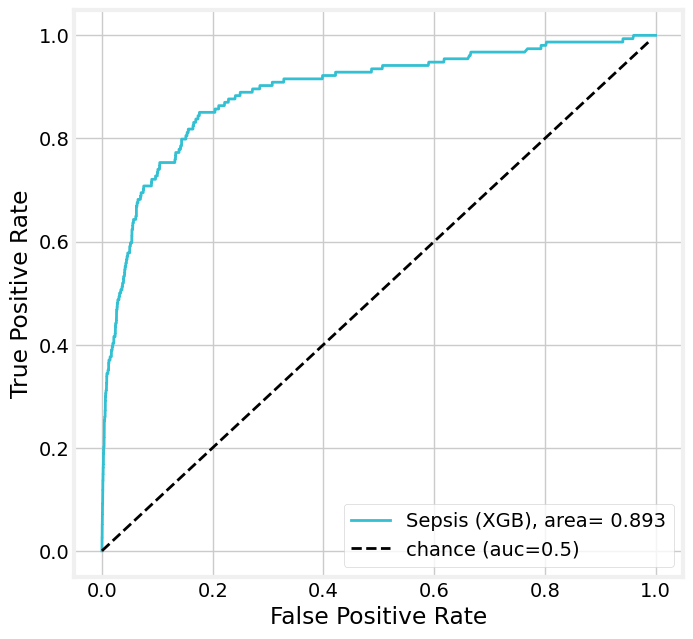

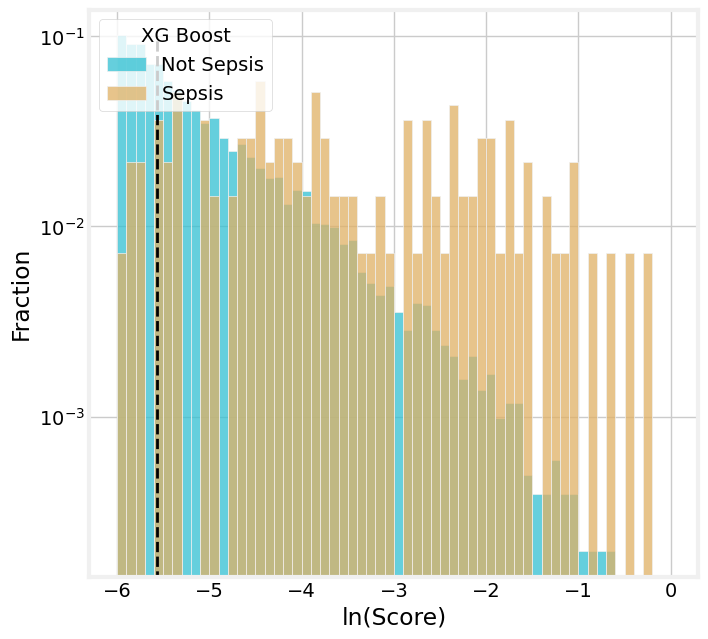

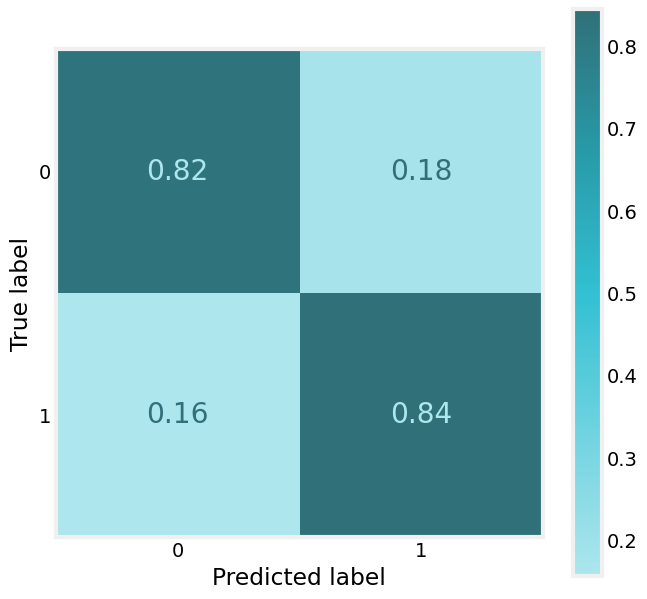

C:\Users\ibertr02\AppData\Local\Temp\ipykernel_31144\3172916403.py:194: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels( list(feat_importances15['name'].values),


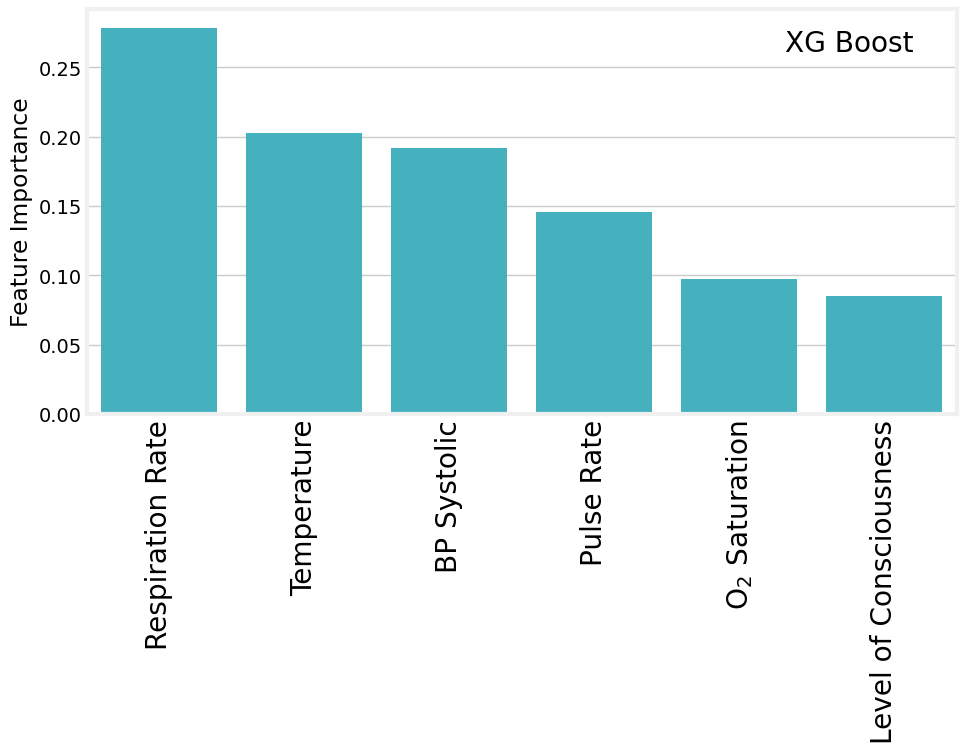

In [11]:
ModelChoice = 'XGB'

if ModelChoice == 'RF':
    best_model = best_model_RandomForest
    tmpString = 'Random Forest'
elif ModelChoice == 'XGB':
    best_model = best_model_XGBoost
    tmpString = 'XG Boost'
    
# tmpString =  'Random Forest'

plt.style.use('./CEIH.mplstyle')
fig, ax = plt.subplots(figsize=(7, 7), facecolor='#FFF' )

# best_model = best_model_RandomForest

y_preds=best_model.predict (X_valid)

y_preds_proba=best_model.predict_proba (X_valid)
# select positive class 
yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

y2=np.ravel(y_valid,order='c')

fpr, tpr, thresholds = roc_curve(y_valid, yprobs)
val,idx = find_nearest(tpr,0.85)
# print(val,tpr[idx],fpr[idx],thresholds[idx])
threshold = np.interp(0.85,tpr,thresholds)  
false_positive =  np.interp(0.85,tpr,fpr)      # fpr[idx]
print("False positive rate for {} is {:.3f}".format(DataSet,false_positive))

auc = roc_auc_score(y_valid, yprobs)
plt.plot(fpr,tpr,label="{} ({}), area= {:.3f}".format(Diagnosis,ModelChoice, auc))


x = np.arange(0,1,0.01)
plt.plot(x,x,label='chance (auc=0.5)',color='k',linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.savefig("Figures/{}_{}_{}_AUC_Plot.png".format(DiagnosisString,tmpString,DataSet), dpi=300, bbox_inches = "tight", facecolor=fig.get_facecolor())

plt.show()

# import math
# def find_nearest(array,value):
#     idx = np.searchsorted(array, value, side="left")
#     if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
#         return array[idx-1],idx-1
#     else:
#         return array[idx],idx


yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y2, "Prob":yprobs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]


yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({DiagnosisString:y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==1]
fig, ax = plt.subplots(figsize=(7, 7))

if ModelChoice == 'RF':

    sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', color= "#E0B165", label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability' , label='{}'.format(Diagnosis))
    plt.legend(loc=1, title="{}".format(tmpString))

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    # print(len(y))
    x =  np.full(shape = len(y), fill_value = threshold)

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')

    fig.patch.set_facecolor('white')
    plt.ylabel("Fraction")
    plt.xlabel("Score")
else: 
    sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-6,0.], binwidth=0.1, stat = 'probability',label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-6,0.], binwidth=0.1,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
    plt.legend(loc=2,  title="XG Boost")
    plt.ylabel("Fraction")

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    #print(len(y))
    x =  np.full(shape = len(y), fill_value = np.log(threshold))

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
    plt.ylabel("Fraction")
    plt.xlabel("ln(Score)")
    plt.yscale('log')
plt.savefig("Figures/{}_{}_{}_Score_Plot.png".format(DiagnosisString,tmpString,DataSet), dpi=300, bbox_inches = "tight")



y_preds2 = np.where(yprobs2<threshold,0,1)

# fig, ax = plt.subplots(figsize=(7, 7))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, y_preds2, normalize='true')
    )
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)

plt.savefig("Figures/{}_{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString,DataSet), dpi=300, bbox_inches = "tight")

plt.show()



# skew_vars=[]
# numeric_features = X_valid.drop(skew_vars, axis=1).select_dtypes(include=['float64', 'int64']).columns #.columns.drop('diagnosis_count')
# categorical_features = X_valid.select_dtypes(include=['category', 'object']).columns
# # print (numeric_features)
# new_cat_cols = best_model['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)
# all_cols = np.concatenate([numeric_features, new_cat_cols])
# print(all_cols)
best_model[1].feature_importances_
feat_importances=pd.Series(best_model[1].feature_importances_ , index=all_cols)
feat_importances=pd.DataFrame(feat_importances).reset_index()

feat_importances.columns=['feature', 'feature_importance']



feat_importances.sort_values('feature_importance', ascending=False, inplace=True)

feat_importances['name'] = None
idx = feat_importances.index


# OtherValues = {'TriageCategory_2':'Triage Category 2', 'SoBFlag': 'Shortness of Breath', 'TriageCategory_4':'Triage Category 4',
#                'TriageCategory_1':'Triage Category 1', 'TriageCategory_5':'Triage Category 5', 'TriageCategory_3':'Triage Category 3',
#              'FirstGCSScoreAdult':'Glasgow Coma Scale',
#                'FirstUrinalysisBlood': 'Urinalysis Blood', 'IndigenousStatusDescription_Not Aboriginal-TSI':  'Non Indiginous',
#                'IndigenousStatusDescription_Not Stated':  'Indiginous Status not stated', 'FirstUrinalysisLeukocytes':'Urinalysis Leukocytes',
#                'FirstPulseRateBPM':'Pulse Rate', 'FirstRespiration':'Respiration Rate', 'FirstSpO2':r'O$_{2}$ Saturation (%)',  'Gender_Male':'Sex - Male',
#                'FirstLevelofConsciousness':'Level of Consciousness', 'IndigenousStatusDescription_Aboriginal and TSI':'Aboriginal and TSI',
#                'IndigenousStatusDescription_TSI':'TSI','Gender_Indeterminate':'Sex - Indeterminate', 'Gender_Unknown':'Sex - Unknown',
#                'FirstO2Flow':r'O$_{2}$ Flow '
#                }


for i in idx:
    # print(i)

    val = feat_importances.loc[i].feature
    # print(i,val)
    try:
        tmpValue = plotSettings[val][4]
        end = tmpValue.rfind(' [')
        # print(end)
        if (end > 0): 
            feat_importances.at[i,'name']= tmpValue[0:tmpValue.rfind(' [')]
        else:
            feat_importances.at[i,'name']= tmpValue
    except: 
        for item9 in OtherValues.keys():
            if val == item9:
                feat_importances.at[i,'name'] = OtherValues[item9]
        
        # if val == 'TriageCategory_2':
        #     feat_importances.at[i,'name']= 'Triage Category 2'
        # else:
        #     print(val)
# print(feat_importances)

feat_importances15=feat_importances.head(15)
fig, ax = plt.subplots(figsize=(10, 5))

#plt.figure(figsize=(10,5))
chart=sns.barplot(x='feature', y='feature_importance', data=feat_importances15, 
                    order=feat_importances15.sort_values('feature_importance', ascending=False).feature, ax=ax
) #color='b')

# print(chart.get_xticklabels())
# chart.set_xticklabels(chart.get_xticklabels(),rotation=90, 
#                     horizontalalignment='right',fontweight='light', fontsize='x-large')

chart.set_xticklabels( list(feat_importances15['name'].values),
                      rotation=90, ha="center",
                   fontweight='light', fontsize='x-large')
# plt.title("feature Importance: {a} {b}".format(a=key,  b=str("Stuff")+': having All Dx'))
plt.ylabel("Feature Importance")
chart.set(xlabel=None)

ax.annotate('{}'.format(tmpString), xy=(0.95, 0.95), xycoords='axes fraction',
            fontsize='x-large', ha='right', va='top')
            #size=14, 
            # ha='right', va='top',
            #bbox=dict(boxstyle='round', fc='w'))
plt.savefig("Figures/{}_{}_{}_Feature_Importance.png".format(DiagnosisString,tmpString,DataSet), dpi=300, bbox_inches = "tight")

plt.show()

# feat_importances_RF = feat_importances.copy()  #.iloc #.head(30)

In [12]:
best_model[1].get_booster().get_fscore()

{'f0': 18.0, 'f1': 4.0, 'f2': 14.0, 'f3': 10.0, 'f4': 7.0, 'f5': 21.0}

In [13]:
fscores=pd.Series(best_model[1].get_booster().get_fscore() , index=all_cols)


In [14]:
X_valid.columns

Index(['FirstBPSystolic', 'FirstLevelofConsciousness', 'FirstPulseRateBPM',
       'FirstRespiration', 'FirstSpO2', 'FirstTemperatureDegreesC'],
      dtype='object')

In [15]:
all_cols

array(['FirstBPSystolic', 'FirstLevelofConsciousness',
       'FirstPulseRateBPM', 'FirstRespiration', 'FirstSpO2',
       'FirstTemperatureDegreesC'], dtype=object)

In [16]:
best_model[1].get_booster().feature_names
best_model[1].get_booster().attributes()
print(best_model[1].get_booster().num_features())


6


In [17]:
best_model[1].feature_importances_

array([0.19193731, 0.08487425, 0.14538378, 0.27791092, 0.0970901 ,
       0.20280367], dtype=float32)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

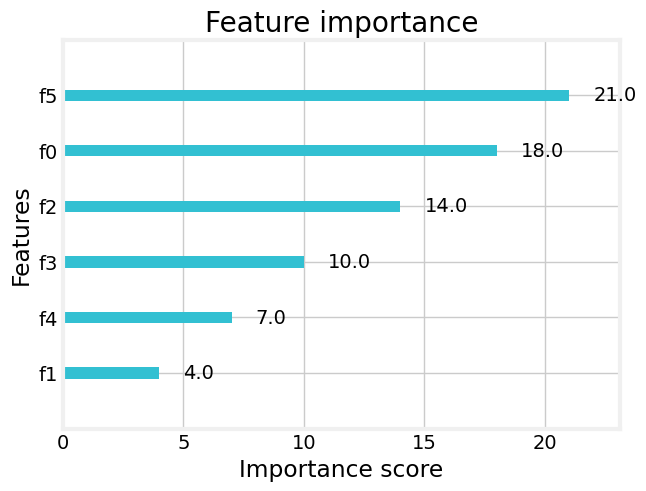

In [18]:
# plt.rcParams["font.family"] = "Calibre"
xgb.plot_importance(best_model[1],importance_type="weight")

In [19]:
for step in range(8):
    tp_selected = 0.80  + step*0.025
    # v,i = find_nearest(tpr,thresh)
    thresh_used = np.interp(tp_selected,tpr,thresholds)  
    fp_selected = np.interp(tp_selected,tpr,fpr)   
    
    print("{:.3f}\t{:.3f}\t{:.3f}".format( tp_selected,fp_selected,thresh_used))

0.800	0.152	0.004
0.825	0.166	0.004
0.850	0.176	0.004
0.875	0.228	0.003
0.900	0.285	0.002
0.925	0.422	0.002
0.950	0.618	0.001
0.975	0.793	0.001


In [20]:
feat_importances #.head()

,feature,feature_importance,name
3,FirstRespiration,0.277911,Respiration Rate
5,FirstTemperatureDegreesC,0.202804,Temperature
0,FirstBPSystolic,0.191937,BP Systolic
2,FirstPulseRateBPM,0.145384,Pulse Rate
4,FirstSpO2,0.097090,O$_{2}$ Saturation
1,FirstLevelofConsciousness,0.084874,Level of Consciousness


In [21]:
indiginous_idx = Emergency_IPInfo_Complete_Numeric.loc[Emergency_IPInfo_Complete_Numeric.IndiginousFlag==1].index

X_valid_idx = X_valid.index
index_choice = indiginous_idx.intersection(X_valid_idx)
X_indiginous_valid = X_valid.loc[index_choice].copy()

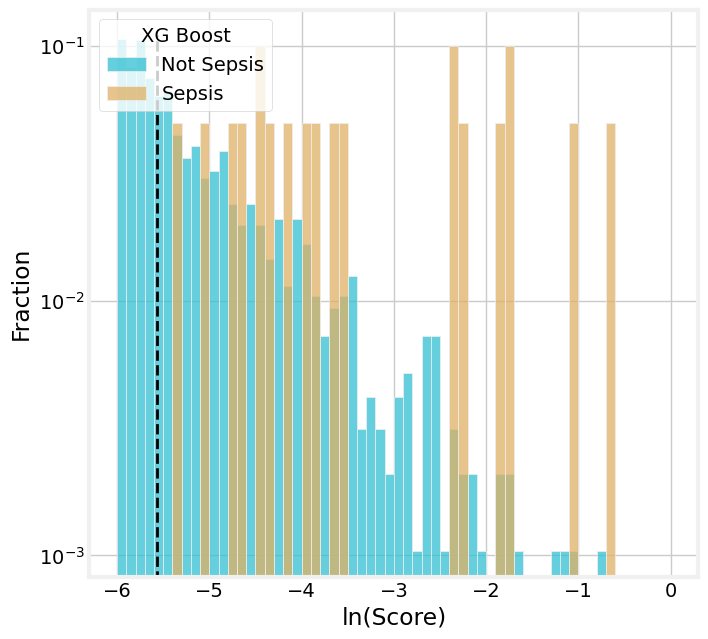

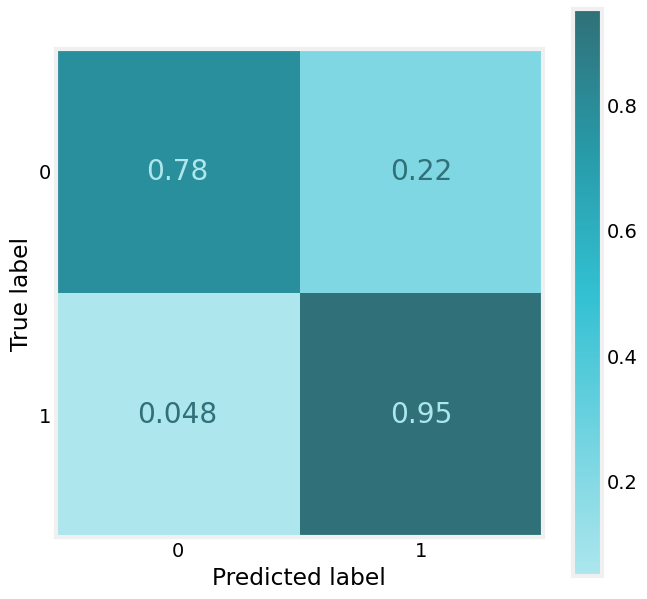

In [22]:
# tmpString =  'Random Forest'




plt.style.use('./CEIH.mplstyle')
# fig, ax = plt.subplots(figsize=(7, 7), facecolor='#FFF' )

# best_model = best_model_RandomForest

# indiginous_idx = 
# 

y_preds=best_model.predict (X_indiginous_valid)

y_preds_proba=best_model.predict_proba (X_indiginous_valid)
# select positive class 
yprobs = np.delete(y_preds_proba,[0],1)
yprobs2 = np.ravel(yprobs,order='c') 

y2=np.ravel(y_valid.loc[index_choice],order='c')




yprobs2 = np.ravel(yprobs,order='c') 

compareResults = pd.DataFrame({DiagnosisString:y2, "Prob":yprobs2})
compareResults.describe()


ResultsFlag0 = compareResults.loc[compareResults[DiagnosisString]==0]
ResultsFlag1 = compareResults.loc[compareResults[DiagnosisString]==1]


yprobslog2 = np.log(yprobs2) 

compareResultsLog = pd.DataFrame({DiagnosisString:y2, "Prob":yprobslog2})
#print(compareResultsLog.describe())


ResultsFlag0_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==0]
ResultsFlag1_xgb_log = compareResultsLog.loc[compareResultsLog[DiagnosisString]==1]
fig, ax = plt.subplots(figsize=(7, 7))

if ModelChoice == 'RF':

    sns.histplot(data=ResultsFlag0, x="Prob",  binrange=[0.,1.], binwidth=0.025, stat = 'probability', color= "#E0B165", label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1, x="Prob",  binrange=[0.,1.], binwidth=0.025,  stat = 'probability' , label='{}'.format(Diagnosis))
    plt.legend(loc=1, title="{}".format(tmpString))

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    # print(len(y))
    x =  np.full(shape = len(y), fill_value = threshold)

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')

    fig.patch.set_facecolor('white')
    plt.ylabel("Fraction")
    plt.xlabel("Score")
else: 
    sns.histplot(data=ResultsFlag0_xgb_log, x="Prob",  binrange=[-6,0.], binwidth=0.1, stat = 'probability',label='Not {}'.format(Diagnosis))
    sns.histplot(data=ResultsFlag1_xgb_log, x="Prob",  binrange=[-6,0.], binwidth=0.1,  stat = 'probability',  color= "#E0B165" , label='{}'.format(Diagnosis))
    plt.legend(loc=2,  title="XG Boost")
    plt.ylabel("Fraction")

    y = np.arange(0.,ax.get_ylim()[1],0.01)
    #print(len(y))
    x =  np.full(shape = len(y), fill_value = np.log(threshold))

    plt.plot(x,y,label='chance (auc=0.5)',color='k',linestyle='--')
    plt.ylabel("Fraction")
    plt.xlabel("ln(Score)")
    plt.yscale('log')
# plt.savefig("Figures/{}_{}_{}_Score_Plot.png".format(DiagnosisString,tmpString,DataSet), dpi=300, bbox_inches = "tight")



y_preds2 = np.where(yprobs2<threshold,0,1)

# fig, ax = plt.subplots(figsize=(7, 7))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid.loc[index_choice], y_preds2, normalize='true')
    )
fig, ax = plt.subplots(figsize=(7,7))
cmp.plot(cmap=cmap_blended, ax=ax, text_kw={'fontsize':'x-large'})
ax.grid(False)

# plt.savefig("Figures/{}_{}_{}_Confusion_Matrix_Plot.png".format(DiagnosisString,tmpString,DataSet), dpi=300, bbox_inches = "tight")

plt.show()


In [23]:
from pandas.api.types import is_numeric_dtype

color_dict = {1: to_rgba("#32C0D2", 1),
                0: to_rgba("#E0B165",1),}


6
['Normal Results', 'Respiration Rate', 'Respiration Rate']
['Normal Results', 'Temperature [$^\\circ$C]', 'Temperature [$^\\circ$C]']
['Normal Results', 'BP Systolic [mm Hg]', 'BP Systolic [mm Hg]']
['Normal Results', 'Pulse Rate', 'Pulse Rate']
['Normal Results', 'O$_{2}$ Saturation [%]', 'O$_{2}$ Saturation [%]']
['Normal Results', 'Level of Consciousness', 'Level of Consciousness']


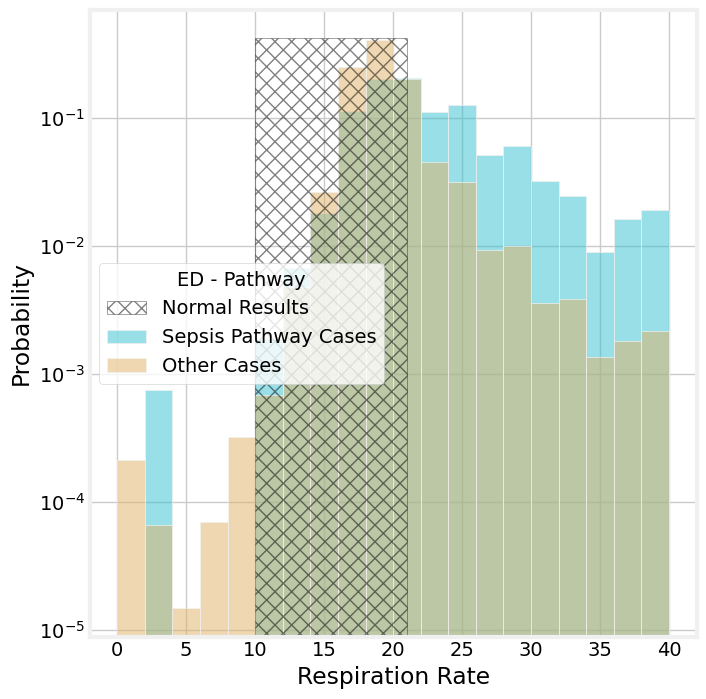

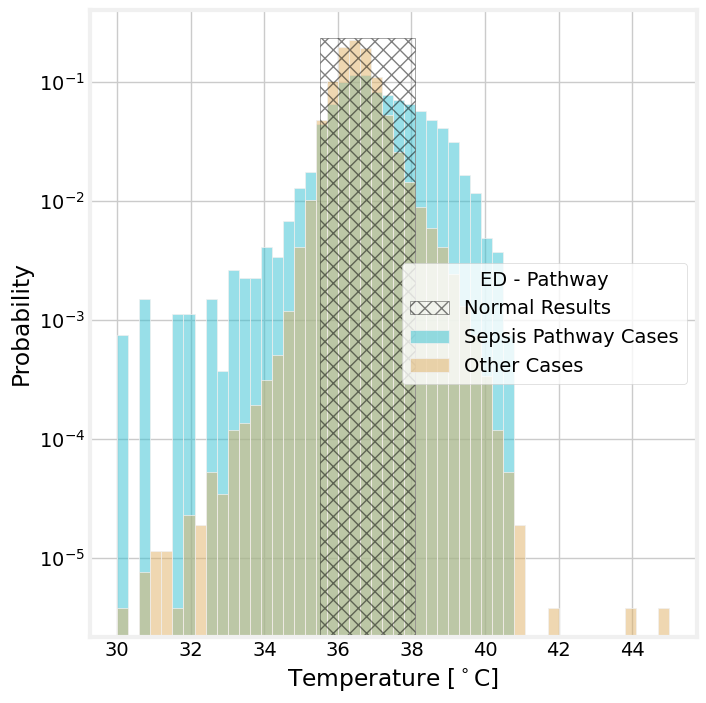

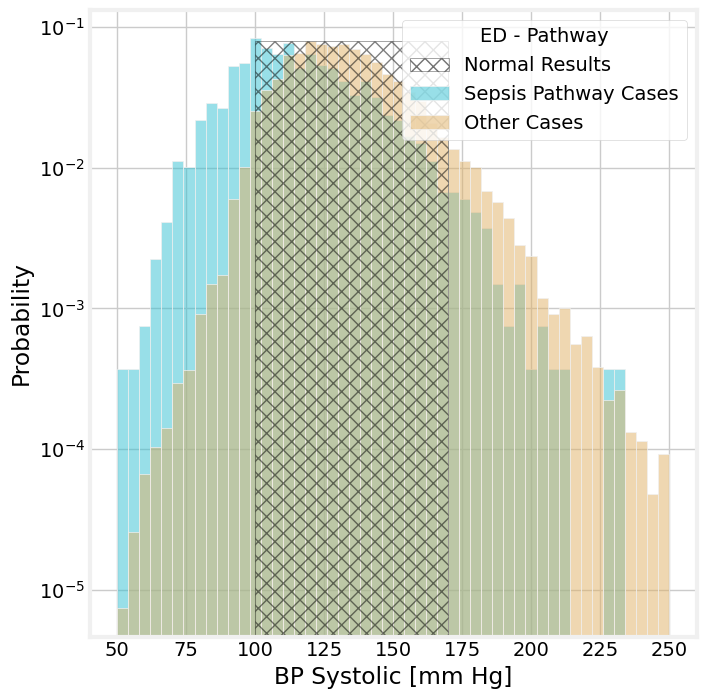

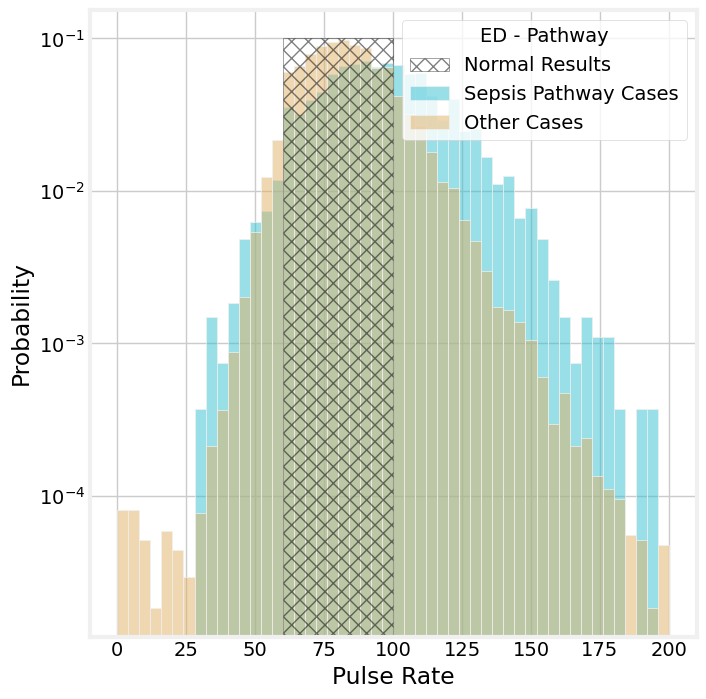

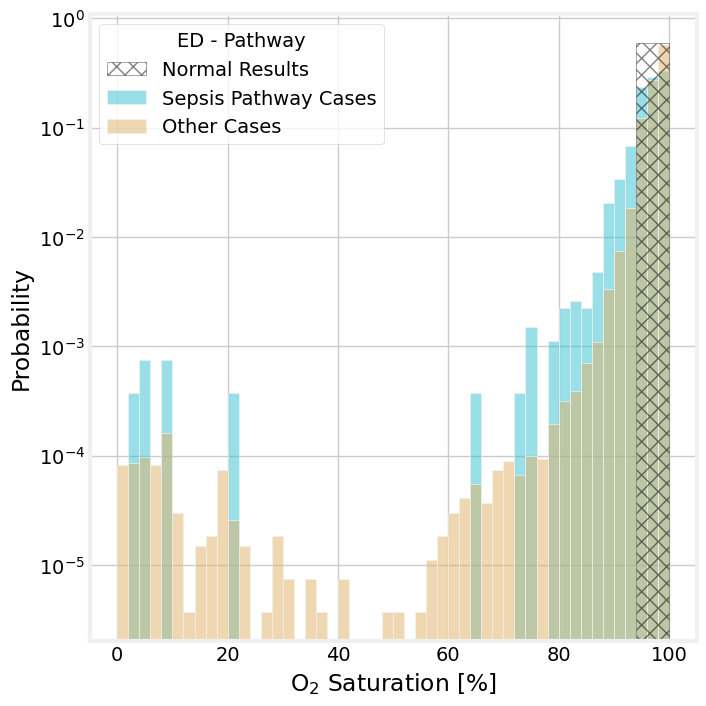

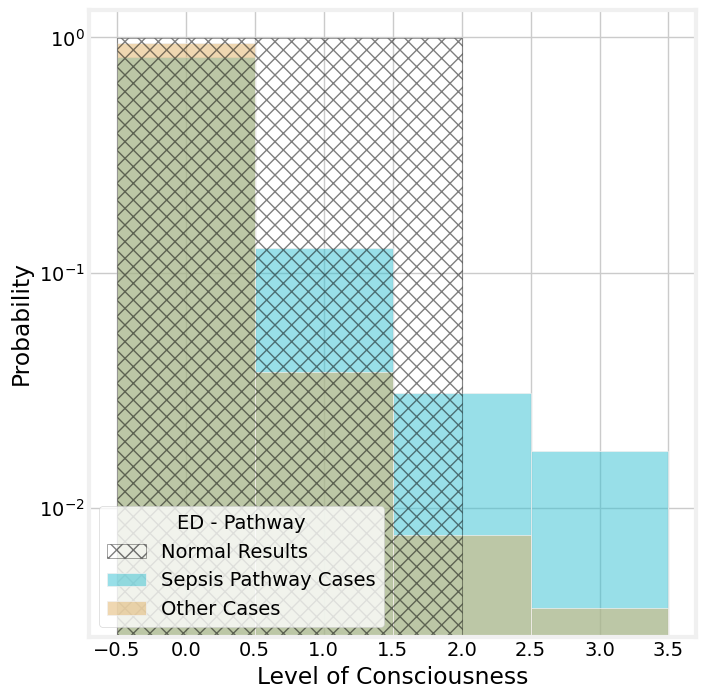

In [24]:
n_features = len(feat_importances.index)
n_features = min(n_features,10)
print(n_features)
for i in range(n_features): 
    item = feat_importances.feature.values[i]
    # print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
    if item in X_valid.keys():
        if is_numeric_dtype(X_valid[item]):
            fig, ax = plt.subplots(figsize=(7, 7))
            fig.tight_layout() 
            plotSettingValues = plotSettings[item]
            
            hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric.loc[~Emergency_IPInfo_Complete_Numeric[item].isna()], x=item,  stat= 'probability', bins=plotSettingValues[0], 
                label=plotSettingValues[4] ,palette=color_dict,binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5, hue=DiagnosisString, common_norm=False,)

            if plotSettingValues[5]:
                x1 = plotSettingValues[6]
                x2 = plotSettingValues[7]
                y = np.arange(0,ax.get_ylim()[1],0.01)
                ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

            # print(hist.get_ylim())
            handles, labels  =  ax.get_legend_handles_labels()
            print(labels)
            ax.legend(handles, [ 'Normal Results', '{} Cases'.format(PlotString), 'Other Cases' ], 
            loc='best',  #bbox_to_anchor=(1,1), 
            title='ED - Pathway')
            hist.plot()
            
            # print(ax.get_ylim())
            ax.set(xlabel=plotSettingValues[4])
            plt.yscale(plotSettingValues[3])

['Pain Assessment', 'Pain Assessment']


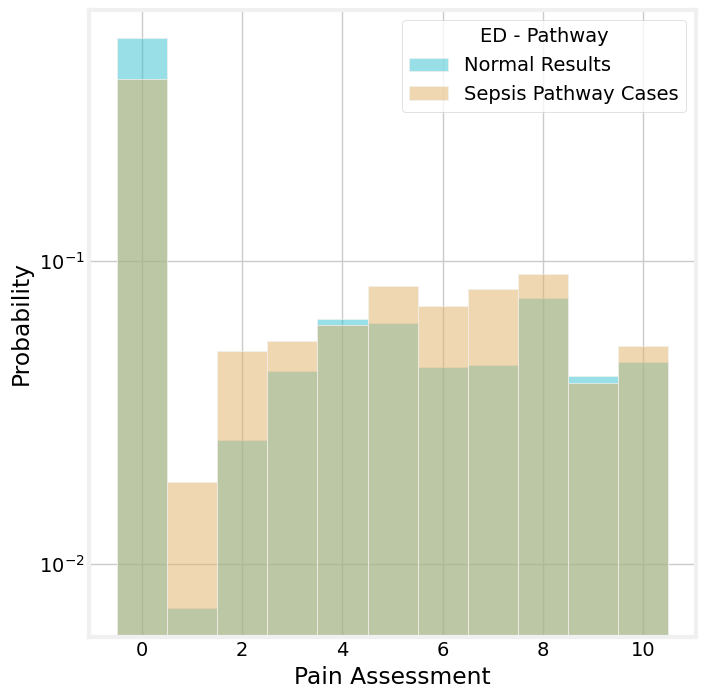

In [25]:

# for i in range(n_features): 
item =  'FirstPainAssessment'  # feat_importances.feature.values[i]
# print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
#if item in X_valid.keys():
# if is_numeric_dtype(X_valid[item]):
fig, ax = plt.subplots(figsize=(7, 7))
fig.tight_layout() 
plotSettingValues = plotSettings[item]

hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric.loc[~Emergency_IPInfo_Complete_Numeric[item].isna()], x=item,  stat= 'probability', bins=plotSettingValues[0], 
    label=plotSettingValues[4] ,palette=color_dict,binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5, hue=DiagnosisString, common_norm=False,)

if plotSettingValues[5]:
    x1 = plotSettingValues[6]
    x2 = plotSettingValues[7]
    y = np.arange(0,ax.get_ylim()[1],0.01)
    ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

# print(hist.get_ylim())
handles, labels  =  ax.get_legend_handles_labels()
print(labels)
ax.legend(handles, [ 'Normal Results', '{} Cases'.format(PlotString), 'Other Cases' ], 
loc='best',  #bbox_to_anchor=(1,1), 
title='ED - Pathway')
hist.plot()

# print(ax.get_ylim())
ax.set(xlabel=plotSettingValues[4])
plt.yscale(plotSettingValues[3])

['Gender', 'Gender']


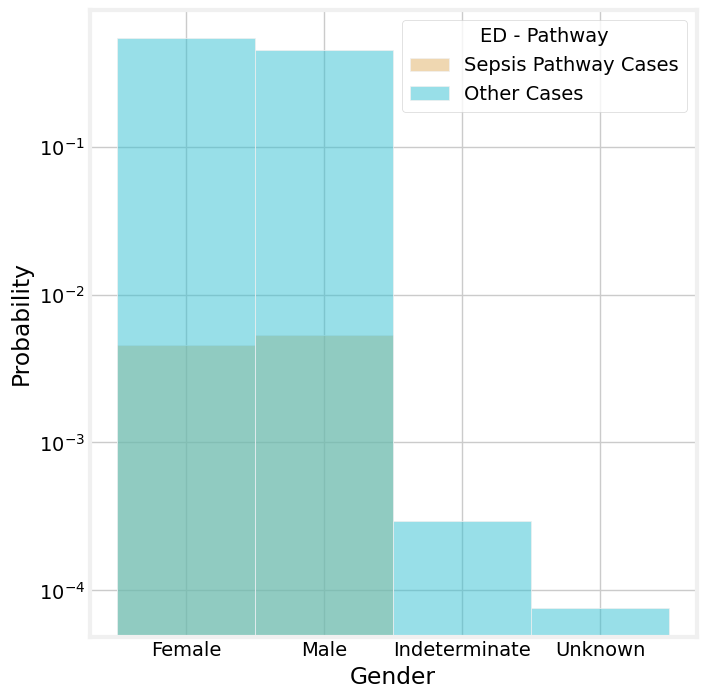

In [26]:
color_dict = {0: to_rgba("#32C0D2", 1),
                1: to_rgba("#E0B165",1),}
item =  'GENDERCODE'  # feat_importances.feature.values[i]
# print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
#if item in X_valid.keys():
# if is_numeric_dtype(X_valid[item]):
fig, ax = plt.subplots(figsize=(7, 7))
fig.tight_layout() 
# plotSettingValues = plotSettings[item]

hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric.loc[~Emergency_IPInfo_Complete_Numeric[item].isna()], x=item,  stat= 'probability', label='Gender', hue=DiagnosisString,palette=color_dict, alpha=0.5) #,  common_norm=False,)

    
# # for i in range(n_features): 
# item =  'GENDERCODE'  # feat_importances.feature.values[i]

# f, ax = plt.subplots(figsize=(7, 7))
# f.tight_layout() 
# ax.grid(False)

# hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric,x='GENDERCODE', palette=color_dict,stat= 'probability',hue=DiagnosisString,common_norm=False, alpha=0.5,) #,binrange=(-0.5,5.5))
ax.set(xlabel='Gender')
# # ax.set(ylabel='Probability')



# # print(i,item,X_valid[item].dtype,is_numeric_dtype(X_valid[item]))
# #if item in X_valid.keys():
# # if is_numeric_dtype(X_valid[item]):
# fig, ax = plt.subplots(figsize=(7, 7))
# fig.tight_layout() 
# # plotSettingValues = plotSettings[item]

# hist = sns.histplot(data=Emergency_IPInfo_Complete_Numeric.loc[~Emergency_IPInfo_Complete_Numeric[item].isna()], x=item,  stat= 'probability', bins=plotSettingValues[0], 
#     label=plotSettingValues[4] ,palette=color_dict,binrange=(plotSettingValues[1], plotSettingValues[2]), alpha=0.5, hue=DiagnosisString, common_norm=False,)

# if plotSettingValues[5]:
#     x1 = plotSettingValues[6]
#     x2 = plotSettingValues[7]
#     y = np.arange(0,ax.get_ylim()[1],0.01)
#     ax.fill_betweenx(y,x1,x2, facecolor='none', edgecolor='black', hatch='xx',alpha=0.5, label='Normal Results')

handles, labels  =  ax.get_legend_handles_labels()
print(labels)
ax.legend(handles, [ '{} Cases'.format(PlotString), 'Other Cases' ], 
loc='best',  #bbox_to_anchor=(1,1), 
title='ED - Pathway')
hist.plot()
plt.yscale('log')
# # print(ax.get_ylim())
# ax.set(xlabel=plotSettingValues[4])
# plt.yscale(plotSettingValues[3])

50 250


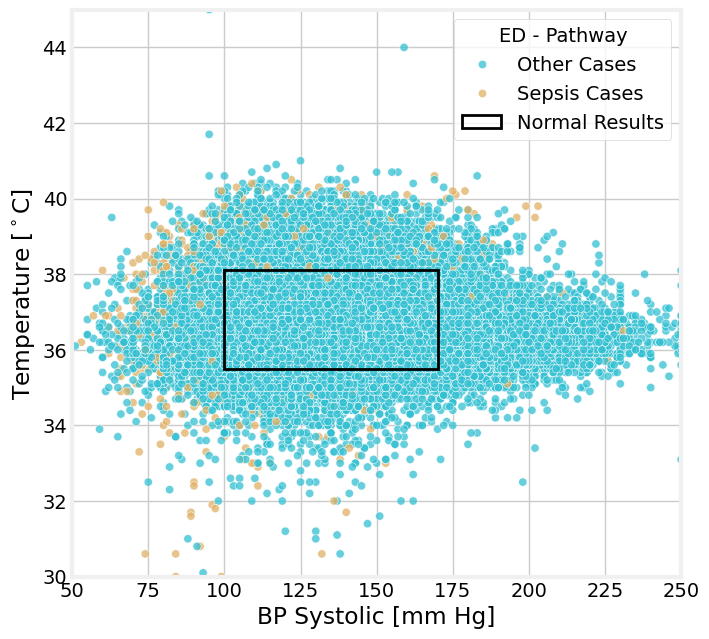

In [27]:
f, ax = plt.subplots(figsize=(7, 7))
importlib.reload(Utilities)

#xlimits = (25,250)
#ylimits = (25,45)

#fig, ax = plt.subplots()
import matplotlib.patches as patches

#ax.set_xl

xkey = 'FirstBPSystolic'
ykey='FirstTemperatureDegreesC'

g = sns.scatterplot(data=Emergency_IPInfo_Complete_Numeric, x=xkey, y=ykey ,hue=DiagnosisString, alpha=.75, palette=color_dict)
print(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_xlim(plotSettings[xkey][1],plotSettings[xkey][2])
ax.set_ylim(plotSettings[ykey][1],plotSettings[ykey][2])

ax.set(xlabel=plotSettings[xkey][4],ylabel=plotSettings[ykey][4])

patchMin = (plotSettings[xkey][6],plotSettings[ykey][6])
patchWidth = plotSettings[xkey][7] - plotSettings[xkey][6]
patchHeight = plotSettings[ykey][7] - plotSettings[ykey][6]

rect = patches.Rectangle(patchMin, patchWidth, patchHeight, linewidth=2, edgecolor='black', facecolor='none',label='Normal Results')  #alpha=0.25)
ax.add_patch(rect)

handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Other Cases', 'Sepsis Cases',  'Normal Results'], 
          loc='best',  #bbox_to_anchor=(1,1), 
          title='ED - Pathway')